In [60]:
# Daily-Coding-Problem_021

'''
Good morning! Here's your coding interview problem for today.

This problem was asked by Snapchat.

Given an array of time intervals (start, end) for classroom lectures (possibly overlapping), 
find the minimum number of rooms required.

For example, given [(30, 75), (0, 50), (60, 150)], you should return 2.
'''

def minRooms(times):
    
    start_times = [(t[0], 1) for t in times]  # [(30, 1), (0, 1), (60, 1)]
    end_times = [(t[1], -1) for t in times]  # [(75, -1), (50, -1), (150, -1)]
    room_allocation = [t[1] for t in sorted(start_times + end_times, key=lambda t: t[0])]  # [1, 1, -1, 1, -1, -1]

    rooms, max_rooms = 0, 0
    for event in room_allocation:
        rooms += event  # occupied or released
        max_rooms = max(max_rooms, rooms)
    assert(rooms == 0)

    return max_rooms

minRooms([(30, 75), (0, 50), (60, 150)])

2

In [61]:
# Daily-Coding-Problem_022
"""
Given a dictionary of words and a string made up of those words (no spaces), return the original sentence in a
list. If there is more than one possible reconstruction, return any of them. If there is no possible
reconstruction, then return null.
Examples:
>>> coding_problem_22(['Riccardo', 'Brigittie', 'and', 'lollipop'], 'RiccardoandBrigittie')
['Riccardo', 'and', 'Brigittie']
>>> coding_problem_22(['quick', 'brown', 'the', 'fox'], 'thequickbrownfox')
['the', 'quick', 'brown', 'fox']
>>> coding_problem_22(['bed', 'bath', 'bedbath', 'and', 'beyond'], 'bedbathandbeyond')
['bed', 'bath', 'and', 'beyond']
"""

def coding_problem_22(dictionary, the_string):
    
    result = []
    while the_string:

        found = False
        for word in dictionary:
            
            if the_string.startswith(word):

                the_string = the_string[len(word):]
                result += [word]
                found = True
                break

        if not found:
            return None

    return result


if __name__ == '__main__':

    import doctest
    doctest.testmod(verbose=True)

Trying:
    coding_problem_22(['Riccardo', 'Brigittie', 'and', 'lollipop'], 'RiccardoandBrigittie')
Expecting:
    ['Riccardo', 'and', 'Brigittie']
ok
Trying:
    coding_problem_22(['quick', 'brown', 'the', 'fox'], 'thequickbrownfox')
Expecting:
    ['the', 'quick', 'brown', 'fox']
ok
Trying:
    coding_problem_22(['bed', 'bath', 'bedbath', 'and', 'beyond'], 'bedbathandbeyond')
Expecting:
    ['bed', 'bath', 'and', 'beyond']
ok
2 items had no tests:
    __main__.coding_problem_22
    __main__.minRooms
1 items passed all tests:
   3 tests in __main__
3 tests in 3 items.
3 passed and 0 failed.
Test passed.


In [146]:
# Daily-Coding-Problem_023
"""
You are given an M by N matrix consisting of booleans that represents a board. Each True boolean represents a wall.
Each False boolean represents a tile you can walk on. Given this matrix, a start coordinate, and an end coordinate,
return the minimum number of steps required to reach the end coordinate from the start. If there is no possible
path, then return null. You can move up, left, down, and right. You cannot move through walls. You cannot wrap
around the edges of the board.
Examples:
>>> map = [[False, False, False, False], [True, True, False, True],
...        [False, False, False, False], [False, False, False, False]]
>>> coding_problem_23(map, (3, 0), (0, 0))
7
>>> map[1][2] = True  # close off path
>>> coding_problem_23(map, (3, 0), (0, 0))  # None
"""

def coding_problem_23(matrix, start, end):
    
    coords = [(index_r, index_c) for index_r, row in enumerate(matrix)
              for index_c, element in enumerate(row) if not element]

    current_distance = 0
    distances = [[None for col in range(len(matrix[0]))] for row in range(len(matrix))]
    distances[start[0]][start[1]] = 0
    while True:

        wavefront = [coord for coord in coords if distances[coord[0]][coord[1]] == current_distance]
        if not wavefront:
            break

        current_distance += 1
        for node in wavefront:

            neighbours = [coord for coord in coords if (abs(node[0] - coord[0]) + abs(node[1] - coord[1])) == 1]
            for n in neighbours:
                if distances[n[0]][n[1]] is None:
                    distances[n[0]][n[1]] = current_distance

    return distances[end[0]][end[1]]


if __name__ == '__main__':

    import doctest
    doctest.testmod(verbose=True)

Trying:
    map = [[False, False, False, False], [True, True, False, True],
           [False, False, False, False], [False, False, False, False]]
Expecting nothing
ok
Trying:
    coding_problem_23(map, (3, 0), (0, 0))
Expecting:
    7
ok
Trying:
    map[1][2] = True  # close off path
Expecting nothing
ok
Trying:
    coding_problem_23(map, (3, 0), (0, 0))  # None
Expecting nothing
ok
3 items had no tests:
    __main__.coding_problem_22
    __main__.coding_problem_23
    __main__.minRooms
1 items passed all tests:
   4 tests in __main__
4 tests in 4 items.
4 passed and 0 failed.
Test passed.


In [145]:
def coding_problem_23(matrix, start, end):
    
    coords = [(index_r, index_c) for index_r, row in enumerate(matrix)
              for index_c, element in enumerate(row) if not element]

    current_distance = 0
    distances = [[None for col in range(len(matrix[0]))] for row in range(len(matrix))]
    distances[start[0]][start[1]] = 0
    while True:

        wavefront = [coord for coord in coords if distances[coord[0]][coord[1]] == current_distance]
        if not wavefront:
            break

        current_distance += 1
        for node in wavefront:

            neighbours = [coord for coord in coords if (abs(node[0] - coord[0]) + abs(node[1] - coord[1])) == 1]
            for n in neighbours:
                if distances[n[0]][n[1]] is None:
                    distances[n[0]][n[1]] = current_distance

    return distances[end[0]][end[1]]

map = [[False, False, False, False], [True, True, False, True],[False, False, False, False], [False, False, False, False]]
coding_problem_23(map, (3, 0), (0, 0))
print(map)

[[False, False, False, False], [True, True, False, True], [False, False, False, False], [False, False, False, False]]


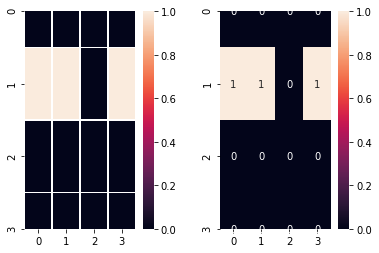

In [179]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

mep=map
mop=np.ones(16)
j=0
for mepind in (mep):
    for i in mepind:

        if i==False:
            mop[j]=0
        else:
            mop[j]=1
        j=j+1
moped=np.reshape(mop,(4,4))

fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.add_subplot(1,2,1)
ax=sns.heatmap(moped,linewidths=.5)
fig.add_subplot(1,2,2)
ay=sns.heatmap(map, annot=True, fmt="d")